##Yes Bank Stock Prediction##

##Introductiom

The objective of this project is to predict the stock prices of Yes Bank using various regression techniques. Stock price prediction is a challenging task due to the inherent volatility and multitude of influencing factors such as market sentiment, economic indicators, and company performance. Accurate predictions can be instrumental for investors and stakeholders in making informed decisions.

In this project, historical stock price data for Yes Bank was utilized, incorporating key features such as opening prices, closing prices, highest and lowest prices, trading volumes, and other relevant financial indicators. The data was preprocessed to handle missing values, normalize the scale, and split into training and testing datasets to ensure robust model evaluation.

Three regression techniques were employed: Linear Regression, Lasso Regression, and Ridge Regression.

Linear Regression is a fundamental technique that models the linear relationship between the dependent variable (Yes Bank stock prices) and the independent variables (predictors). Despite its simplicity, it provides a good baseline for comparison.

Lasso Regression (Least Absolute Shrinkage and Selection Operator) enhances the linear regression model by adding a penalty term that forces some of the coefficients to be exactly zero, thereby performing feature selection. This helps in simplifying the model and potentially improving its predictive performance by reducing overfitting.

Ridge Regression is another extension of linear regression that adds a penalty term based on the squared magnitude of the coefficients. It addresses multicollinearity issues by shrinking the coefficients, though it does not perform feature selection like Lasso.

The models were evaluated using performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to determine their predictive accuracy and robustness. The results were analyzed to identify the most effective model for predicting Yes Bank’s stock prices.Through this project, valuable insights were gained into the behavior of Yes Bank’s stock prices and the efficacy of different regression techniques in predicting stock market trends. The findings highlight the importance of model selection and the potential benefits of regularization techniques in improving predictive performance.

##Problem statement

The objective of this project is to develop a predictive model for Yes Bank's stock prices. Stock price prediction is a crucial aspect of financial markets, enabling investors to make informed decisions. However, predicting stock prices is inherently challenging due to their volatile nature and the multitude of factors that influence them, including economic indicators, market trends, and company-specific news.

The primary goal is to leverage historical stock price data and various financial indicators to predict future stock prices of Yes Bank. This involves the following tasks:

1)Data Collection and Preprocessing: Gather historical stock price data for Yes Bank along with relevant financial indicators. Preprocess the data to handle missing values, normalize features, and split the dataset into training and testing sets.

2)Model Development: Implement three regression models—Linear Regression, Lasso Regression, and Ridge Regression—to capture the relationship between the predictors and the stock prices.

3)Model Evaluation: Assess the performance of the developed models using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to determine their predictive accuracy and robustness.

5)Analysis and Insights: Analyze the results to identify the most effective model and gain insights into the factors that significantly influence Yes Bank's stock prices. Evaluate the impact of regularization techniques (Lasso and Ridge) on model performance and feature selection.

By addressing these tasks, the project aims to provide a reliable predictive model for Yes Bank's stock prices, offering valuable insights for investors and contributing to more informed investment decisions.

In [ ]:
import numpy as np           # importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-31ea3c98ff27>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


###Load the YesBank stock price dataset

In [ ]:
df=pd.read_csv('/content/data_YesBank_StockPrices.csv')
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


##Data Exploration

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
None


In [ ]:
print("The total numbers of rows and columns are:",df.shape)

The total numbers of rows and columns are: (185, 5)


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
numerical_col = df.describe().columns

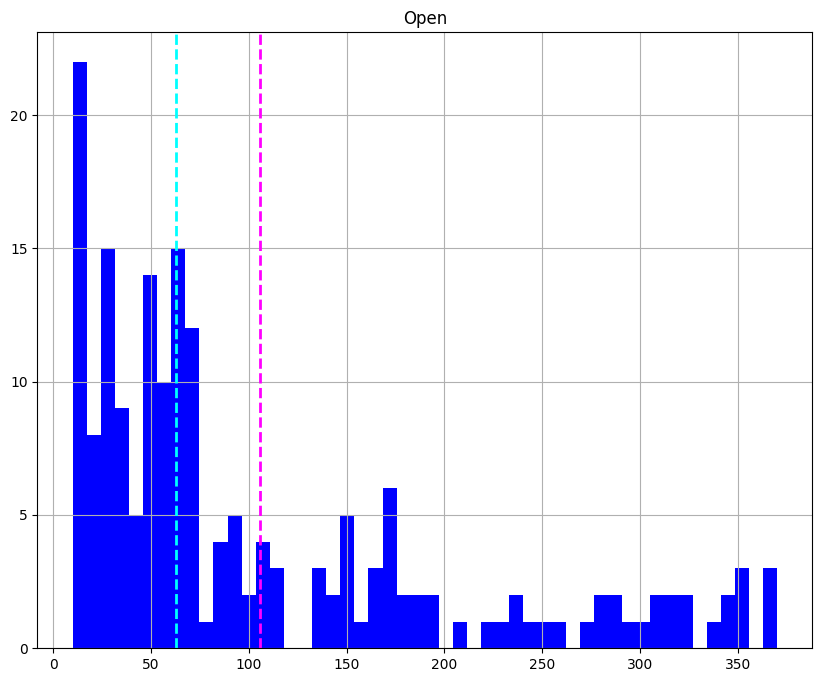

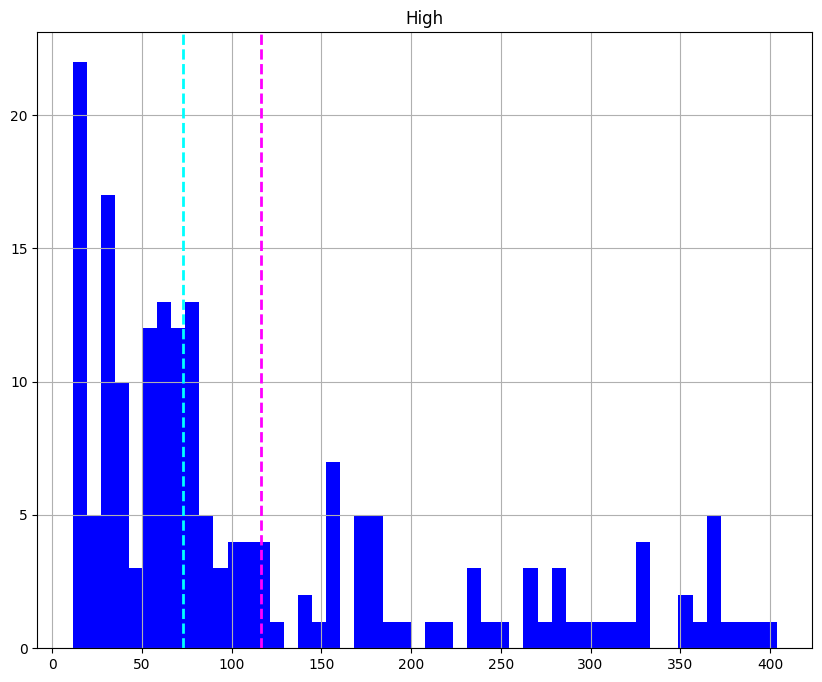

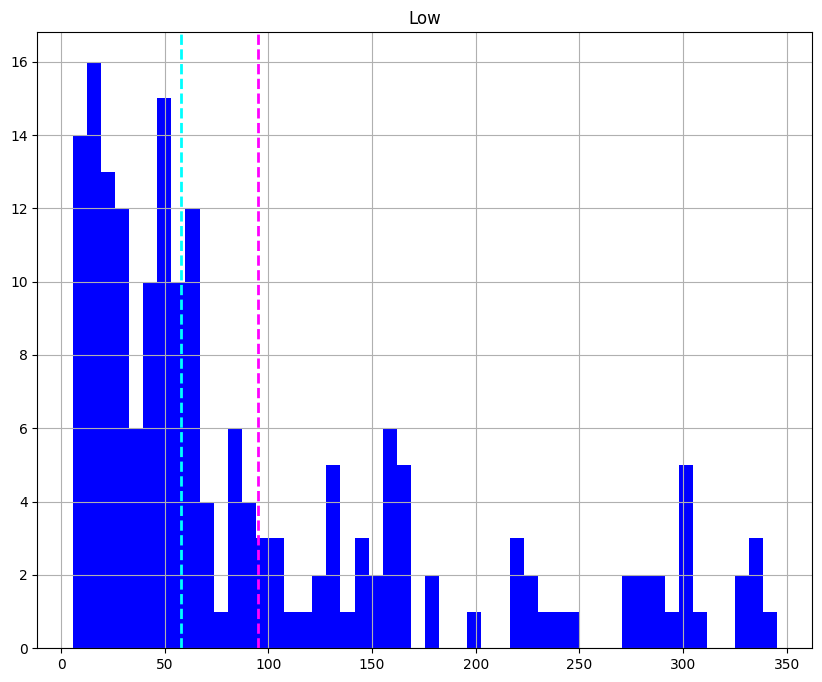

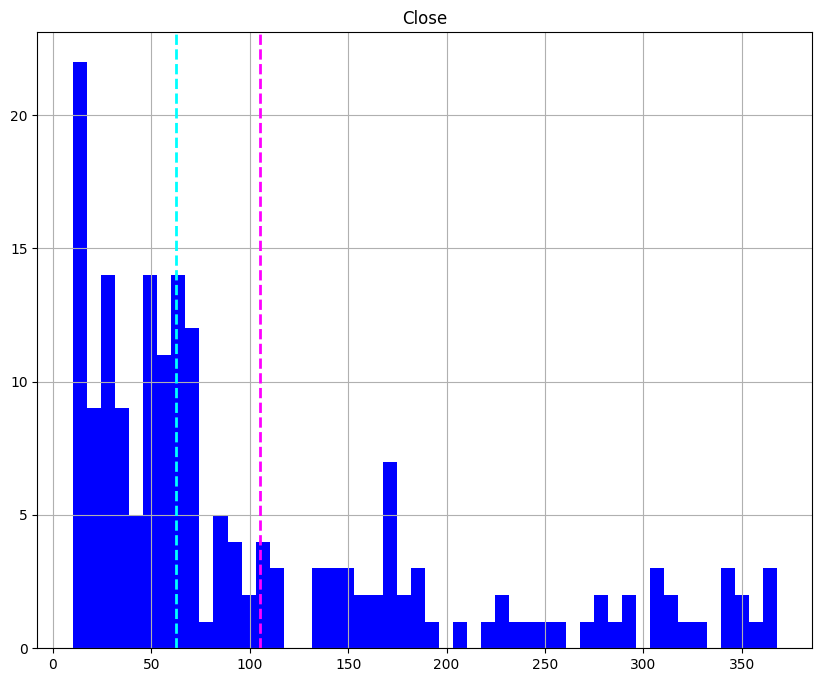

In [ ]:
for i in numerical_col[:]:
  fig = plt.figure(figsize=(10,8))
  ax = fig.gca()
  features = df[i]
  label = df['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

## Understanding our dataset


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df.describe()    # description of our dataset

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


we can clearly see mean is greater then median so data is not normally distributed



---



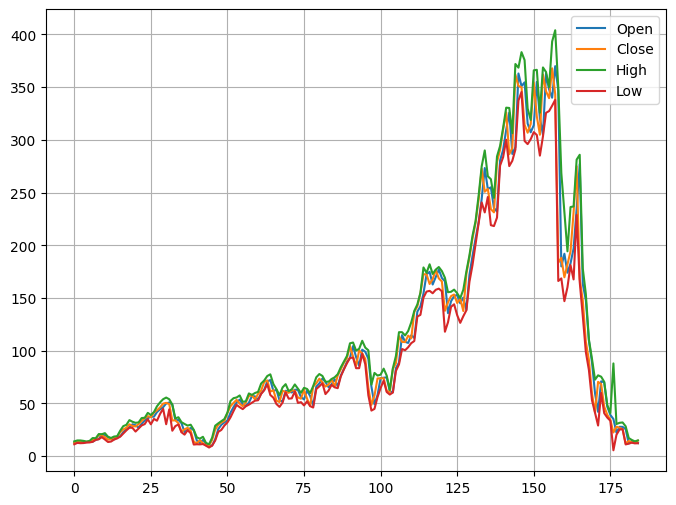

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['Open','Close','High','Low'])
plt.grid()
plt.show()




---

checking for null values and outliers


In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

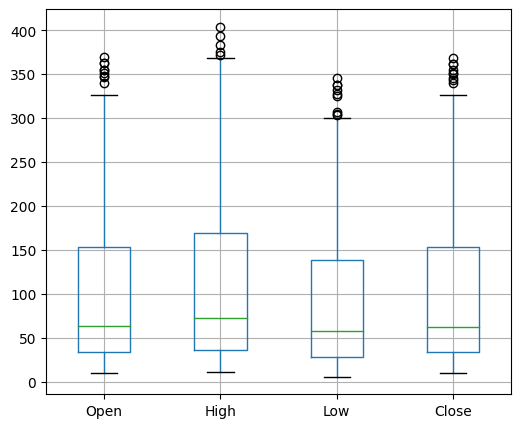

In [ ]:
plt.figure(figsize=(6,5))
df.boxplot(column=['Open','High','Low','Close'])
plt.show()



---



EDA


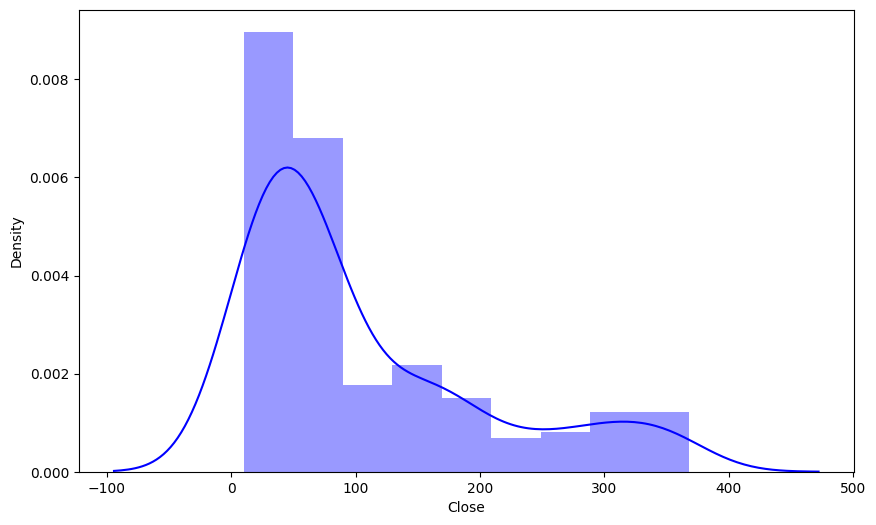

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Close'],color='blue')
plt.show()

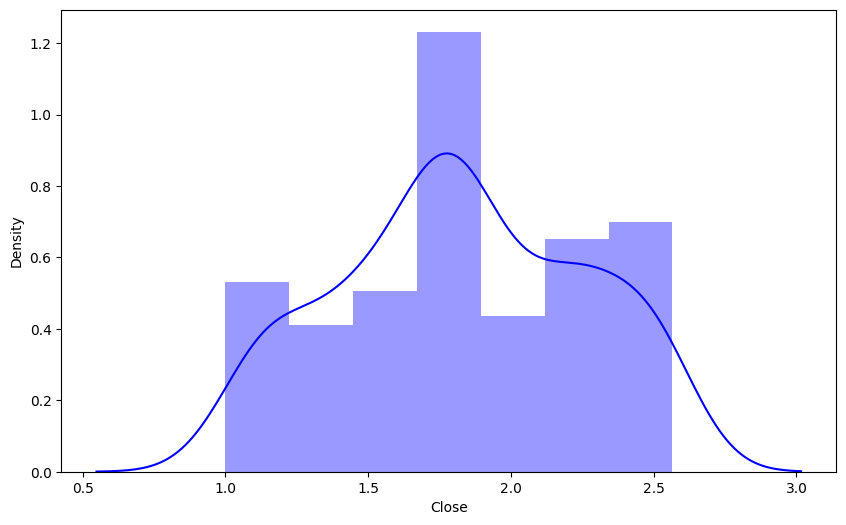

In [ ]:
# For normal Distribution
plt.figure(figsize=(10,6))
sns.distplot(np.log10(df['Close']),color='blue')
plt.show()

<Axes: xlabel='Low', ylabel='Density'>

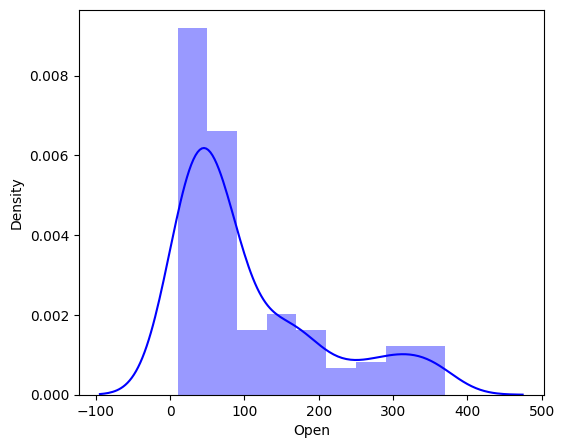

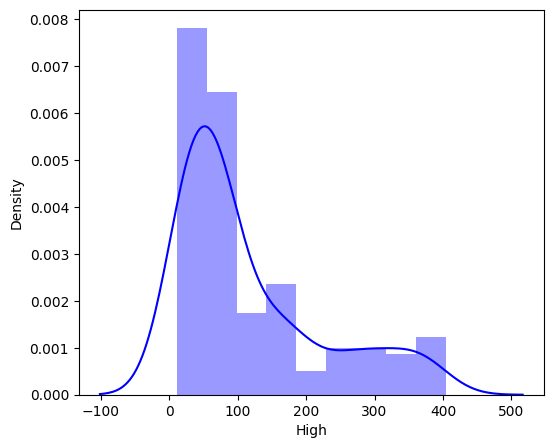

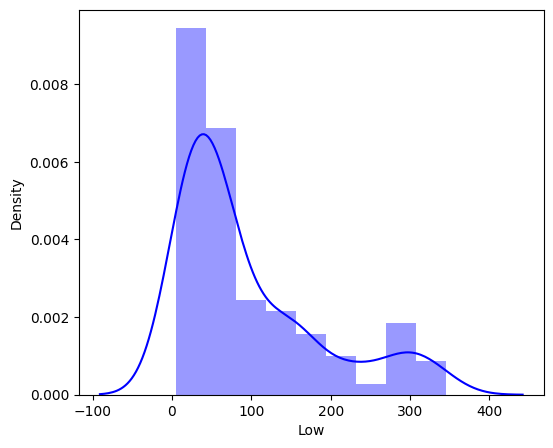

In [ ]:
plt.figure(figsize=(6,5))
sns.distplot(df['Open'], color='blue')

plt.figure(figsize=(6,5))
sns.distplot(df['High'], color='blue')

plt.figure(figsize=(6,5))
sns.distplot(df['Low'], color='blue')

<Axes: xlabel='Low', ylabel='Density'>

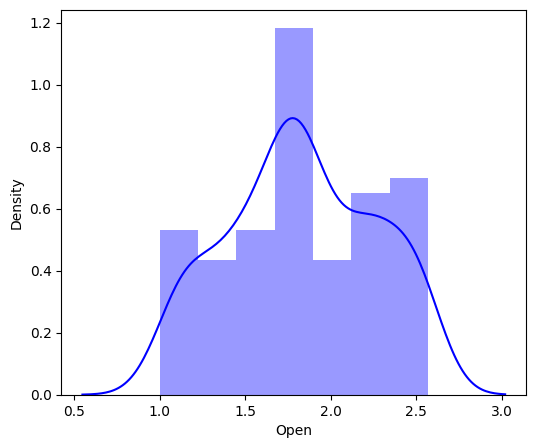

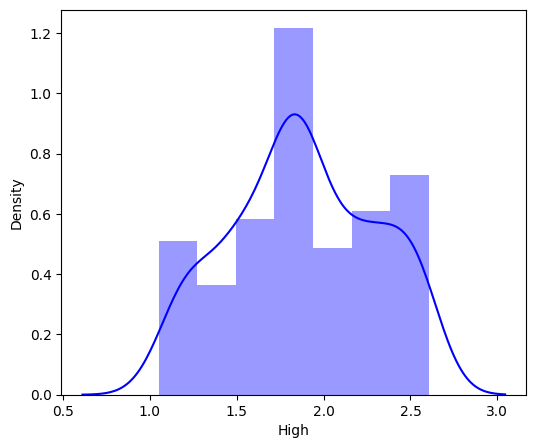

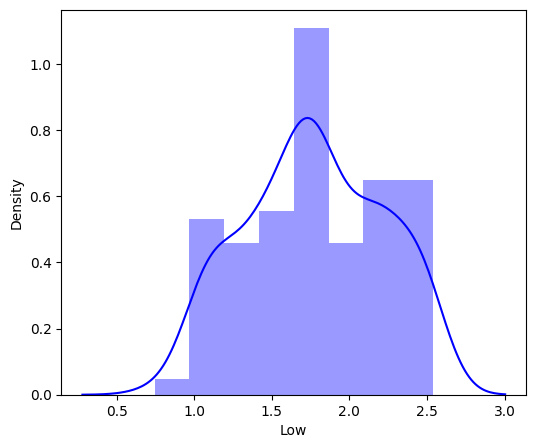

In [ ]:
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Open']), color='blue')

plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['High']), color='blue')

plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Low']), color='blue')

<Axes: >

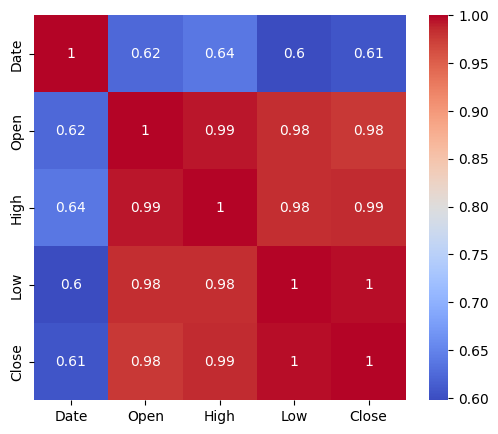

In [ ]:
# Correaltion Between the Variables
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

Finding Correlation Between Variables



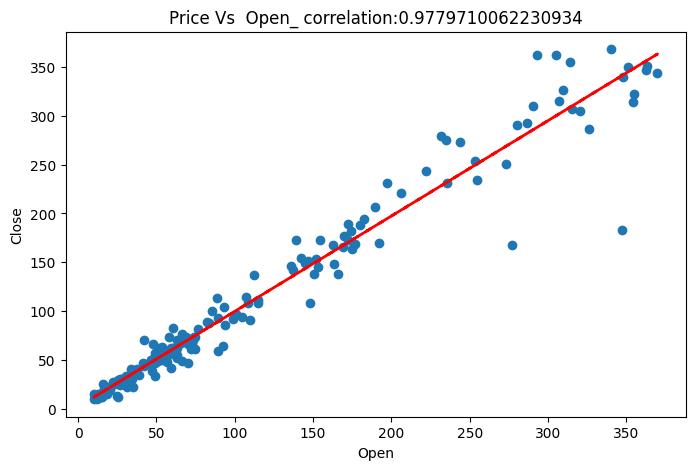

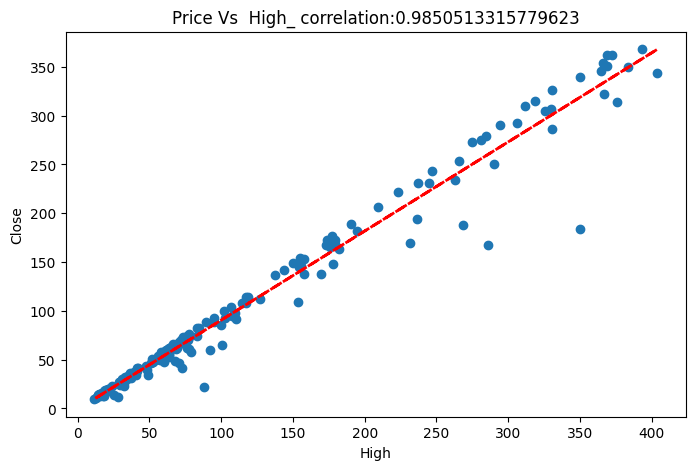

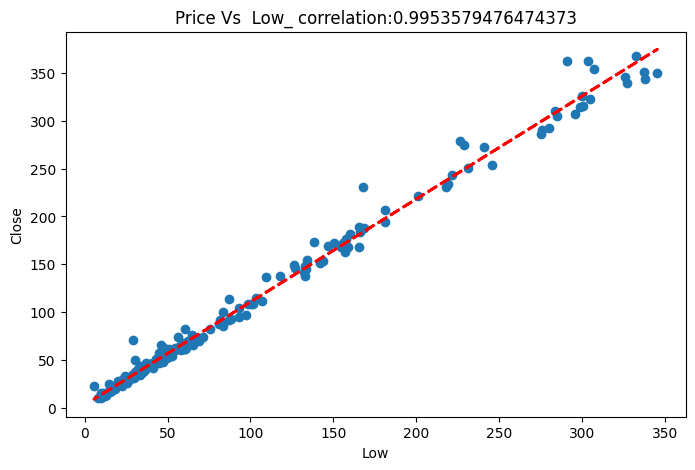

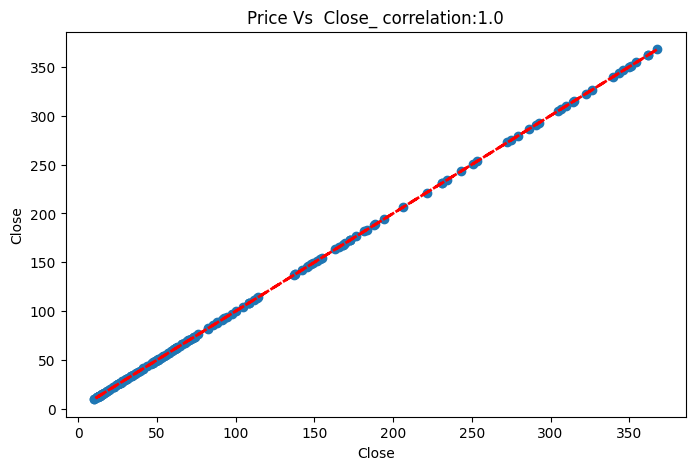

In [ ]:
for col in numerical_col[:]:
  fig = plt.figure(figsize = (8,5))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col] , y_hat, "r--",lw = 2)
plt.show()

Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


<Axes: >

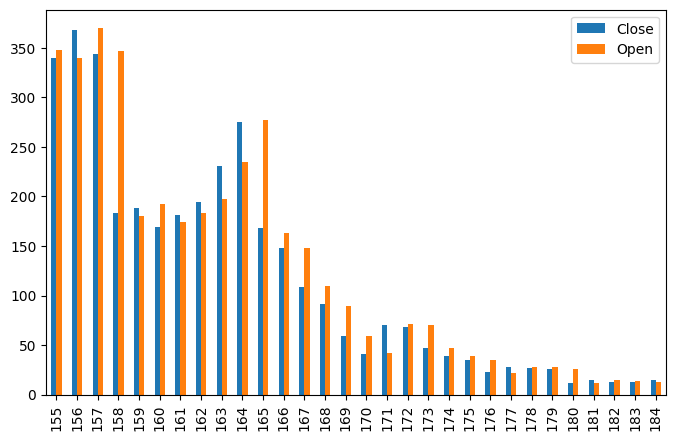

In [ ]:
df[['Close','Open']].tail(30).plot(kind='bar',figsize=(8,5))



---



---



##Linear Regression Model


Normalizing data

In [ ]:
# Splitting our data into Dependent and Independent Variables
X = df.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(df['Close'])


Train Test Split



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


Linear Regrassion


In [ ]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

0.8146653424416905

In [ ]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
print(reg.intercept_)
print(reg.coef_)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

1.8292785179315048
[-0.04654099  0.19795929  0.23173905]
0.8146653424416905
0.8225699915389754


In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754


In [ ]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


Linear Regression Predication vs Actual



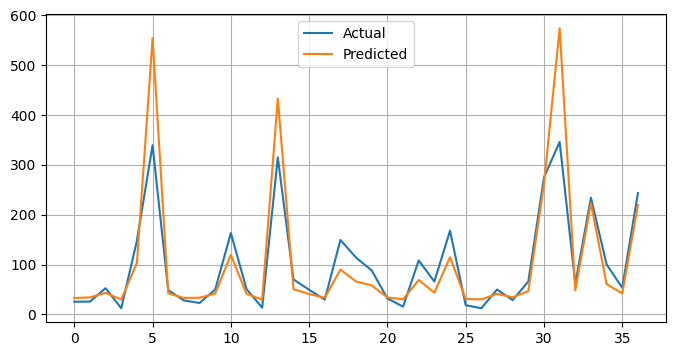

In [ ]:
# Linear Regression Plotting
plt.figure(figsize=(8,4))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

Lasso Regression


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))


0.8143673030311667


In [ ]:
y_lasso_pred = lasso.predict(X_test)

Evaluation Matrics



In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03204505144876297
RMSE : 0.17901131653826516
MAE : 0.15232245780607623
R2 : 0.8199714923878543


Lasso Predication vs Actual



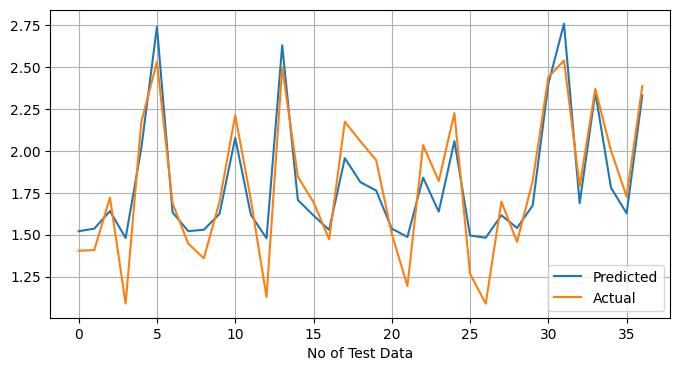

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

Cross Validification


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-parameter Tuning

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv,parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
lasso_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
y_pred_lasso = lasso_model.predict(X_test)

Evaluation Matrics



In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


Lasso Predication vs Actual (After Validification)



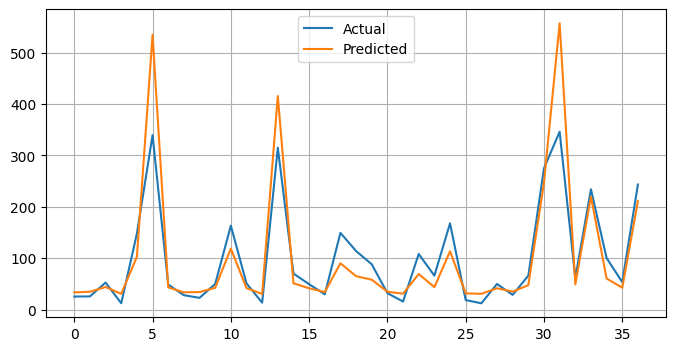

In [ ]:
# Lasso plotting
plt.figure(figsize=(8,4))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

Ridge Linear Regression¶


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.81465524840887

In [ ]:
y_ridge_pred = ridge.predict(X_test)

Evaluation Matrics



In [ ]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03165980533958239
RMSE : 0.17793202449132756
MAE : 0.1514311710092201
R2 : 0.8221357979190861


Ridge Predication vs Actual



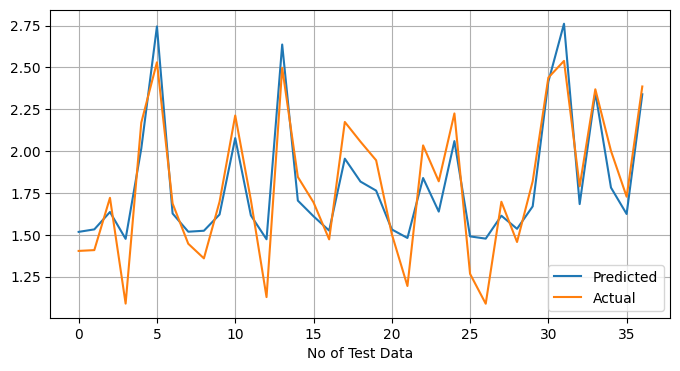

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

Cross Validification


In [ ]:
# Hyper-parameter Tuning
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [ ]:
# Model Predication
y_pred_ridge  = ridge_model.predict(X_test)

Evaluation Matrics



In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.03253593988266965
RMSE : 0.18037721553086924
MAE : 0.15307727568266652
R2 : 0.8172136902260576


Ridge Predication vs Actual (After Validification)



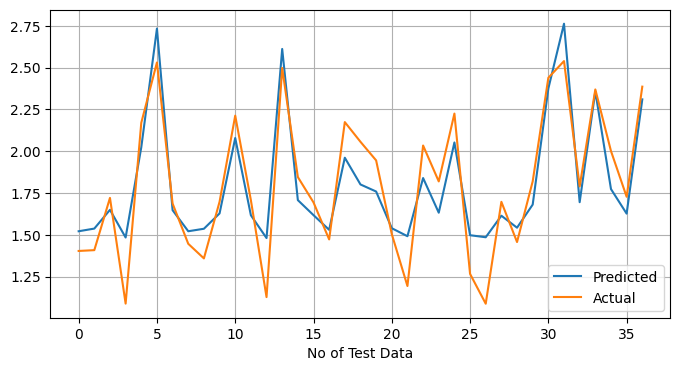

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

#conclusion

This project aimed to predict Yes Bank's stock prices using historical data and various regression techniques, namely Linear Regression, Lasso Regression, and Ridge Regression. By leveraging these models, we sought to capture the complex relationships between stock prices and multiple financial indicators.

Our analysis demonstrated that:

Linear Regression provided a fundamental baseline model, showing a basic level of predictive capability.

Lasso Regression improved upon this by performing feature selection, simplifying the model, and reducing overfitting by shrinking some coefficients to zero.

Ridge Regression addressed multicollinearity issues by penalizing large coefficients, thus providing a more stable and generalizable model.

The performance of each model was evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). Among the three models, Lasso Regression and Ridge Regression showed significant improvements over the basic Linear Regression model, highlighting the importance of regularization techniques in enhancing predictive accuracy.Our findings suggest that regularized regression models, such as Lasso and Ridge, are more effective in predicting stock prices due to their ability to handle complex relationships and mitigate overfitting. This project not only provides a reliable predictive model for Yes Bank's stock prices but also underscores the critical role of advanced regression techniques in financial forecasting.

In conclusion, while stock price prediction remains a challenging endeavor due to market volatility and external influences, the application of robust regression models can yield valuable insights and improve the reliability of predictions. Future work could explore more sophisticated models, such as ensemble methods or neural networks, to further enhance prediction accuracy.

##thankyou